# Cooperation vs score

This notebook reads the summary data from the latest run of the tournament: http://axelrod-tournament.readthedocs.io/en/latest/ and looks at the relationship between [cooperation rating](http://axelrod.readthedocs.io/en/latest/tutorials/getting_started/tournament_results.html#morality-metrics) and [scores](http://axelrod.readthedocs.io/en/latest/tutorials/getting_started/tournament_results.html#normalised-scores).

**Note: the results and data correspond to version 1.8 of axelrod.** If rerunning this data with a new version of the tournament the significance results could potentially change.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy as sp
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
def obtain_joint_plot(data_url, title):
    """Read the data from the corresponding url"""
    df = pd.read_csv(data_url)
    sns.jointplot(x="Cooperation_rating", y="Median_score", data= df, kind="reg", space=0.4)
    plt.xlabel('Cooperation rating', fontsize=15)
    plt.ylabel('Median score', fontsize=15)
    plt.title(title, fontsize=15)
    plt.xlim(0, 1);
    return plt, df

## Standard tournament

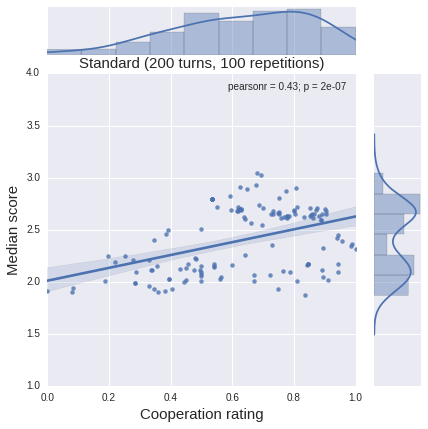

In [49]:
std_data_url = "http://axelrod-tournament.readthedocs.io/en/latest/_downloads/strategies_std_ranks.csv"
_, std_df = obtain_joint_plot(std_data_url, "Standard (200 turns, 100 repetitions)");

The more cooperative you are: the higher you score.

In [50]:
std_df.describe()

,Rank,Median_score,Cooperation_rating
count,136.000000,136.000000,136.000000
mean,67.500000,2.401488,0.635871
std,39.403892,0.316684,0.219690
min,0.000000,1.868815,0.000000
25%,33.750000,2.109968,0.498249
50%,67.500000,2.432139,0.653422
75%,101.250000,2.677449,0.808867
max,135.000000,3.039333,1.000000


Let us categorise the strategies by cooperation rating.

In [51]:
categories = ['low', 'med', 'high']
std_df["Cooperation_category"], bins = pd.qcut(std_df.Cooperation_rating, 3, categories, retbins=True)
bins

array([ 0.        ,  0.53542556,  0.77439222,  1.        ])

Are the scores normaly distributed in all our bins?

In [52]:
std_scores_by_cat = [group[1].Median_score for group in std_df.groupby('Cooperation_category')]
max([sp.stats.mstats.normaltest(scores)[1] for scores in std_scores_by_cat])

0.073102610843859897

No: so we will now use a non parametric test to see if the categorisation has an effect on the performance.

In [54]:
_, p_val = sp.stats.mstats.kruskalwallis(*std_scores_by_cat)
p_val

1.2508875231644054e-06

We have a significant effect of the categorisation. Let us visualise it:

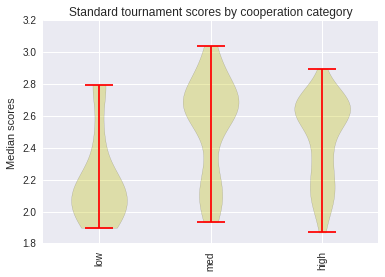

In [55]:
plt.violinplot(std_scores_by_cat)
plt.ylabel("Median scores")
plt.title("Standard tournament scores by cooperation category")
plt.xticks([1, 2, 3], categories, rotation=90);

## Noisy tournament

0.05 chance of noise.

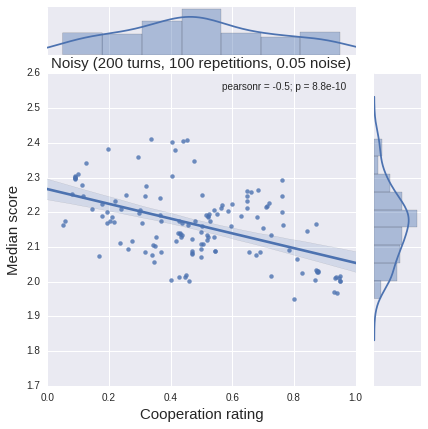

In [56]:
noisy_data_url = "http://axelrod-tournament.readthedocs.io/en/latest/_downloads/strategies_noisy_ranks.csv"
_, noisy_df = obtain_joint_plot(noisy_data_url, "Noisy (200 turns, 100 repetitions, 0.05 noise)");

The more cooperative you are: the **lower** you score.

In [57]:
noisy_df.describe()

,Rank,Median_score,Cooperation_rating
count,136.000000,136.000000,136.000000
mean,67.500000,2.162395,0.491329
std,39.403892,0.103619,0.241248
min,0.000000,1.951389,0.049936
25%,33.750000,2.087315,0.319422
50%,67.500000,2.167361,0.473225
75%,101.250000,2.223782,0.663718
max,135.000000,2.412463,0.950033


We see (from the quantile bin boundaries) that no strategy either fully cooperates of defects. This is expected due to the noise.

In [63]:
noisy_df["Cooperation_category"], bins = pd.qcut(noisy_df.Cooperation_rating, 3, categories, retbins=True)
bins

array([ 0.04993556,  0.40089667,  0.56451778,  0.95003333])

Our scores are not normally distributed:

In [64]:
noisy_scores_by_cat = [group[1].Median_score for group in noisy_df.groupby('Cooperation_category')]
max([sp.stats.mstats.normaltest(scores)[1] for scores in noisy_scores_by_cat])

0.83369045544033804

but the categorisation does have an effect on the scores:

In [65]:
_, p_val = sp.stats.mstats.kruskalwallis(*noisy_scores_by_cat)
p_val

0.0012085687241696892

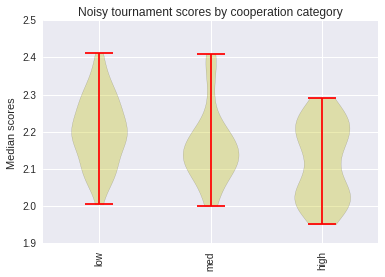

In [62]:
plt.violinplot(noisy_scores_by_cat)
plt.ylabel("Median scores")
plt.title("Noisy tournament scores by cooperation category")
plt.xticks([1, 2, 3], categories, rotation=90);

## Probabilistic ending tournament

.1 chance of any given match ending

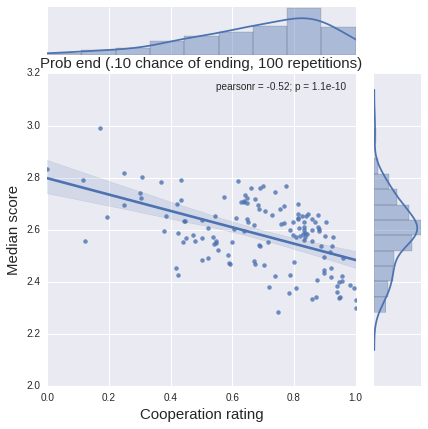

In [67]:
probend_data_url = "http://axelrod-tournament.readthedocs.io/en/latest/_downloads/strategies_probend_ranks.csv"
_, probend_df = obtain_joint_plot(probend_data_url, "Prob end (.10 chance of ending, 100 repetitions)");

Again: more cooperative, lower score.

In [68]:
probend_df.describe()

,Rank,Median_score,Cooperation_rating
count,136.000000,136.000000,136.000000
mean,67.500000,2.581609,0.687369
std,39.403892,0.129639,0.213508
min,0.000000,2.282542,0.000000
25%,33.750000,2.491883,0.547729
50%,67.500000,2.594066,0.723032
75%,101.250000,2.656570,0.848833
max,135.000000,2.992086,1.000000


In [69]:
probend_df["Cooperation_category"], bins = pd.qcut(probend_df.Cooperation_rating, 3, categories, retbins=True)
bins

array([ 0.        ,  0.63665921,  0.81873156,  1.        ])

The data is not normally distributed:

In [71]:
probend_scores_by_cat = [group[1].Median_score for group in probend_df.groupby('Cooperation_category')]
max([sp.stats.mstats.normaltest(scores)[1] for scores in probend_scores_by_cat])

0.1860725563324451

There is an effect of the categories:

In [73]:
_, p_val = sp.stats.mstats.kruskalwallis(*probend_scores_by_cat)
p_val

2.4777479142529167e-05

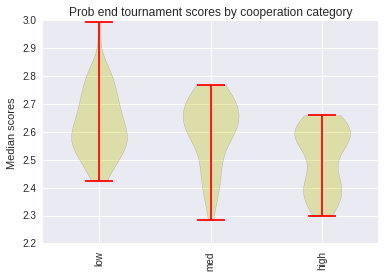

In [74]:
plt.violinplot(probend_scores_by_cat)
plt.ylabel("Median scores")
plt.title("Prob end tournament scores by cooperation category")
plt.xticks([1, 2, 3], categories, rotation=90);